# Univariate and Multivariate Analysis of the Axis Insurance Dataset

## Importing Necessary Libraries such as pandas, numpy, matplotlib.pyplot, seaborn

In [1]:
#import all neccesary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import t
from scipy.stats import chi2_contingency #For Chi-Sq
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

## Reading the data from a .csv file

In [2]:
#read csv into a dataframe called 'data'
data = pd.read_csv('AxisInsurance.csv')

In [3]:
#copying the data frame into a new data frame to retain original data.
df = pd.DataFrame(data)

## Checking the first 6 rows

In [4]:
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


### Observations

* Age contains the age of the customer
* Sex contains the gender of the customer
* BMI contains the body mass index of the customer
* Children contains the number of children the insurance plan for that customer covers
* Smoker contains whether the customer smokes or not
* Region contains where the customer resides
* Charges contains the costs of health insurance for that customer
* Sex, Smoker and Region are categorical variables
* All other variables are numerical

## Checking a description of the data

In [5]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Observations

* Sex and Smoker have 2 unique categories while Region has 4 unique categories

## Checking the shape and info of the dataset

In [6]:
df.shape

(1338, 7)

There are 1338 rows and 7 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observations

* All columns have 1338 observations
* There three data types represented across all columns: float64, int64 and object
* sex, smoker and region need to be changed from object types to categorical types

# Data Preprocessing

### Fixing the categorical types

In [8]:
#Changing the types from object to categorical

df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')

In [9]:
#Checking to ensure changes took effect properly

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


The data types of the categorical variables have been fixed.

### Checking for duplicates and missing values

In [10]:
# Check for missing values in any column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset.

In [11]:
#Check for duplicates
df.duplicated().sum()

1

There's one duplicate record in the dataset that we shall have to remove.

In [12]:
#Drop all duplicated rows
df = df.drop_duplicates()

In [13]:
#Rechecking to see if there are still duplicates
df.duplicated().sum()

0

There aren't any duplicate records in the dataset.

### Dealing with outliers

For this particular dataset, outliers shall not be removed because they are valuable data points in the dataset that can help  provide useful insights and information.

# Exploratory Data Analysis

## 1) Univariate Analysis

We shall look at some graphs using numerical variables as input then categorical later on

### a) Numerical Variables

In [14]:
#This function allows us to create a boxplot and a histogram for any numerical variable that is given as input
#It also helps us to see the means and medians for the graphs
def hist_boxplot(df_cat,figsize=(15,7),bins=30):
    
    fig,(box_ax, hist_ax) = plt.subplots(nrows=2, 
                                        sharex=True, 
                                        gridspec_kw = {"height_ratios": (.25, .75)},
                                        figsize=figsize);

    sns.boxplot(df_cat,ax=box_ax, showmeans=True,color='skyblue');#For plotting the boxplot
    
    sns.distplot(df_cat, kde=False, ax=hist_ax, bins=bins); #Plotting the histogram
    hist_ax.axvline(df_cat.mean(), color='b', linestyle='--'); #Plotting the mean on the histogram with a blue dashed line
    hist_ax.axvline(df_cat.median(), color='r', linestyle='-'); #Plotting the median on the histogram with a red line

### Observations on age

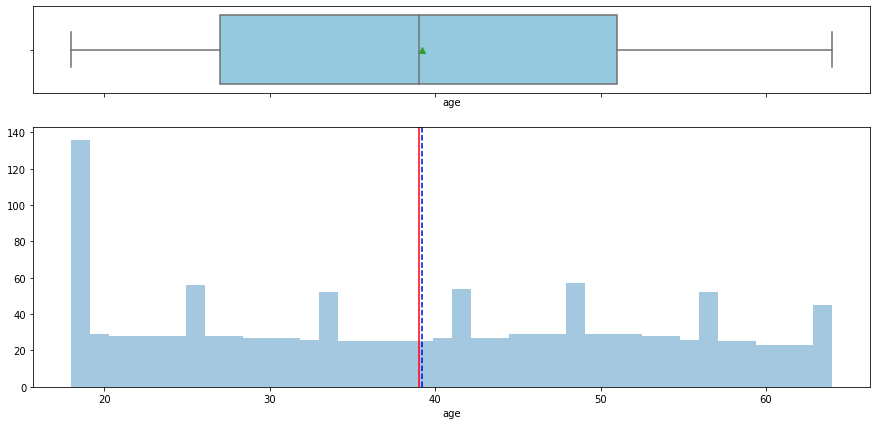

In [15]:
#Calling the function hist_boxplot with the input variable 'age' to get the boxplot and histogram as output
hist_boxplot(df['age'], bins=40);

#### Observations

* The mean and median are relatively the same indicating no skewness for the variable 'age'
* We have a high number of young customers(below the age of 20) in the dataset
* age does not contain any outliers

### Observations on BMI

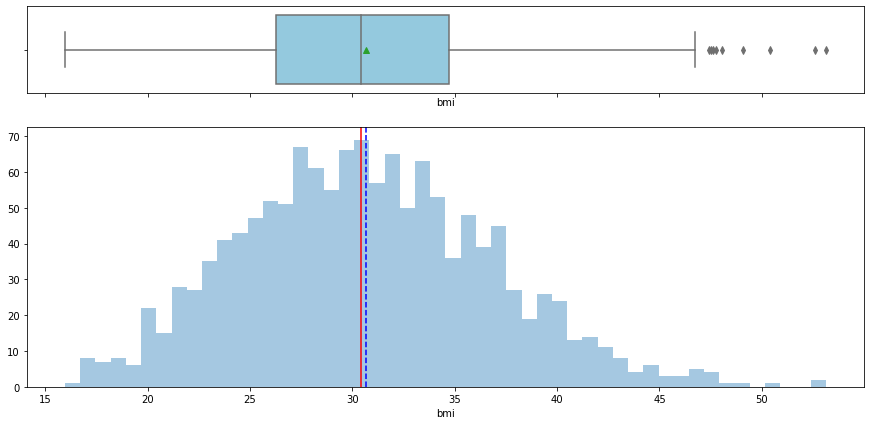

In [16]:
hist_boxplot(df['bmi'], bins=50);

#### Observations

* The mean and median here are also relatively the same, where the variable 'bmi' follows a normal distribution
* The average BMI is a little over 30 indicating on an average, most customers are overweight
* There are a few outliers to the right indicating some customers are severely overweight 

### Observations on children

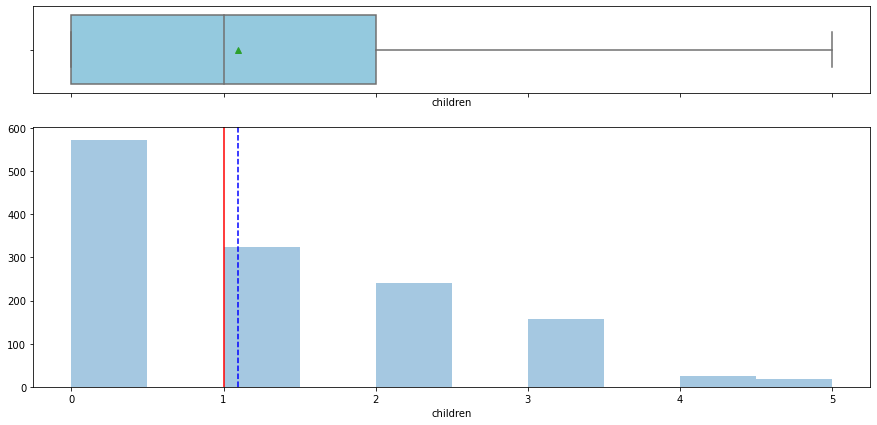

In [17]:
hist_boxplot(df['children'], bins=10);

#### Observations

* The distribution is slightly right skewed seeing as the mean is greater than the median
* The high frequency of 0 indicates many customers do not have their children on the insurance plan
* Very few people have up to 5 children covered by insurance

### Observations on charges

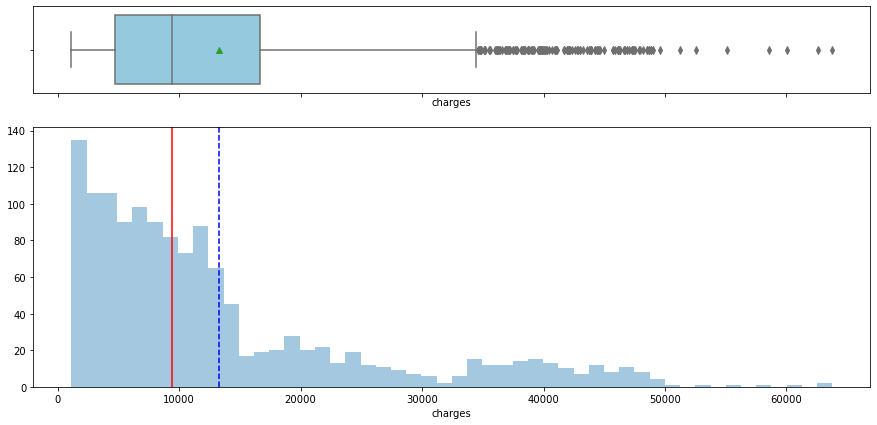

In [18]:
hist_boxplot(df['charges'], bins=50);

#### Observations

* The distribution is right skewed
* A high number of customers pay costs below 15,000 in health insurance
* There are quite a number of outliers to the right of the distribution, indicating there a significant number of people that pay high costs in terms of health insurance

### b) Categorical Variables

Bar charts shall be used to give visual descriptions of the categorical variables.

### Observations on sex

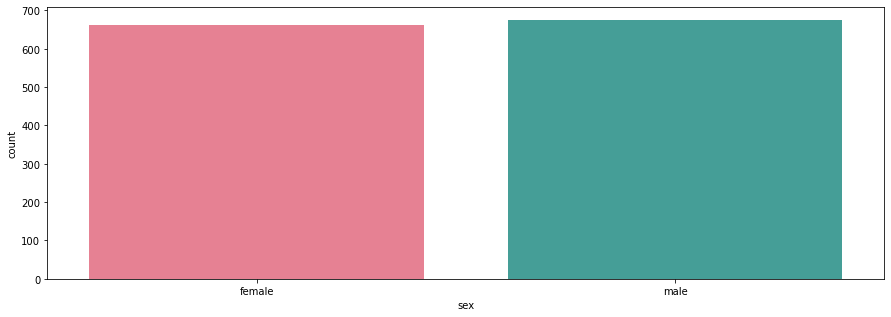

In [19]:
plt.figure(figsize=(15,5));
sns.countplot(df['sex'], palette='husl');

#### Observations

* The number of males and females in the dataset are relatively the same, with males being ever so slightly higher

### Observations on smoker

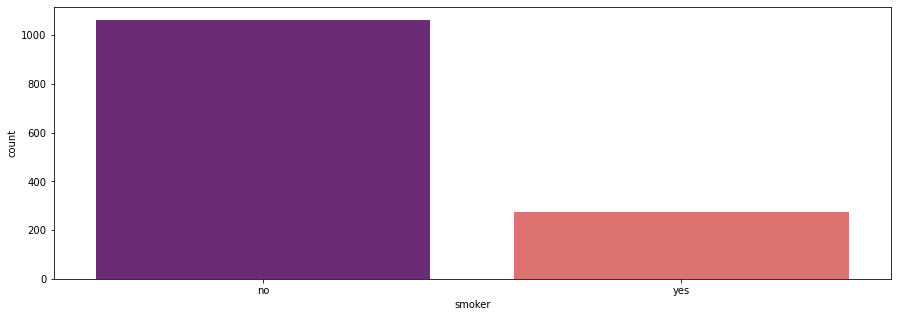

In [20]:
plt.figure(figsize=(15,5));
sns.countplot(x='smoker',data=df, palette='magma');

#### Observations

* The high number of 'no's' indicates there are much more customers who don't smoke than those who do

### Observations on region

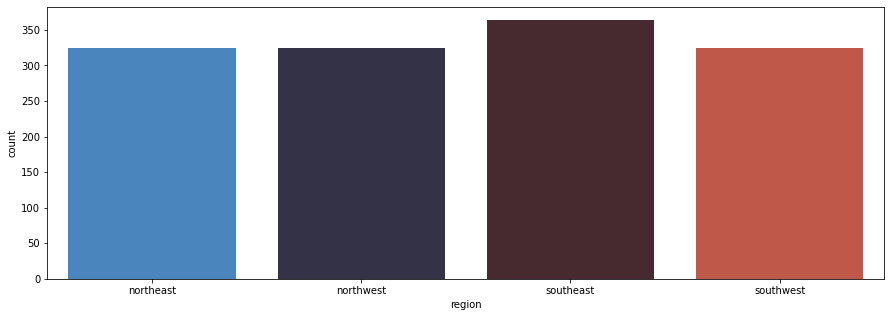

In [21]:
plt.figure(figsize=(15,5));
sns.countplot(df['region'], palette='icefire');

#### Observations

* There's a relatively equal spread of the number of customers from different regions with the southeast region having a little more customers coming from there

## Bivariate Analysis

We shall plot some graphs that shall help us take a look and understand some of the interactions between the numerous variables 

### Correlation

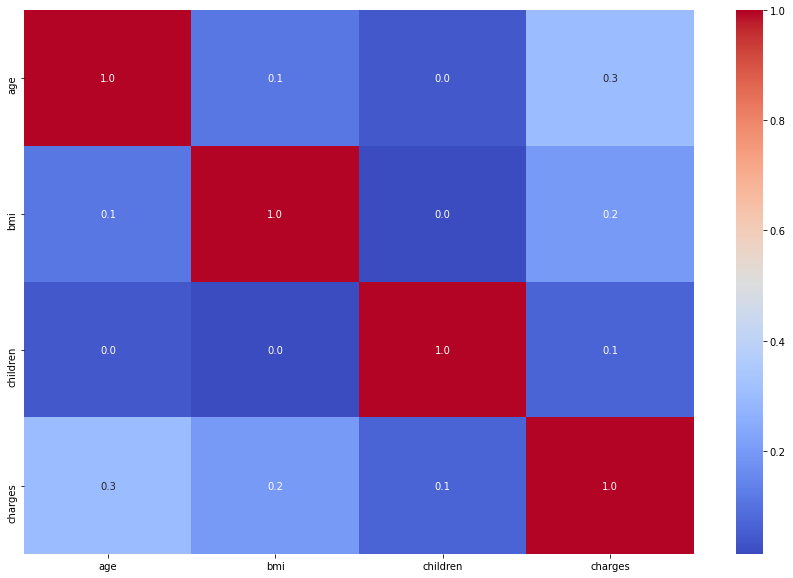

In [22]:
#We shall use a heat map to check the correlation between numerical variables

num_vals = ['age', 'bmi', 'children', 'charges']; #Array containing the names of numerical variables
fig,ax = plt.subplots(figsize=(15,10));
sns.heatmap(df[num_vals].corr(),ax=ax,annot=True, cmap='coolwarm', fmt='.1f');

### Observations

* This map shows relatively little to no correlation between the variables. (we could also use a pairplot to confirm this)
* The relationship between children and age is very weak, the same can be said for children and bmi.
* There seems to be very slight positive correlation between age and charges, also between bmi and charges although further checks shall be required to confirm.

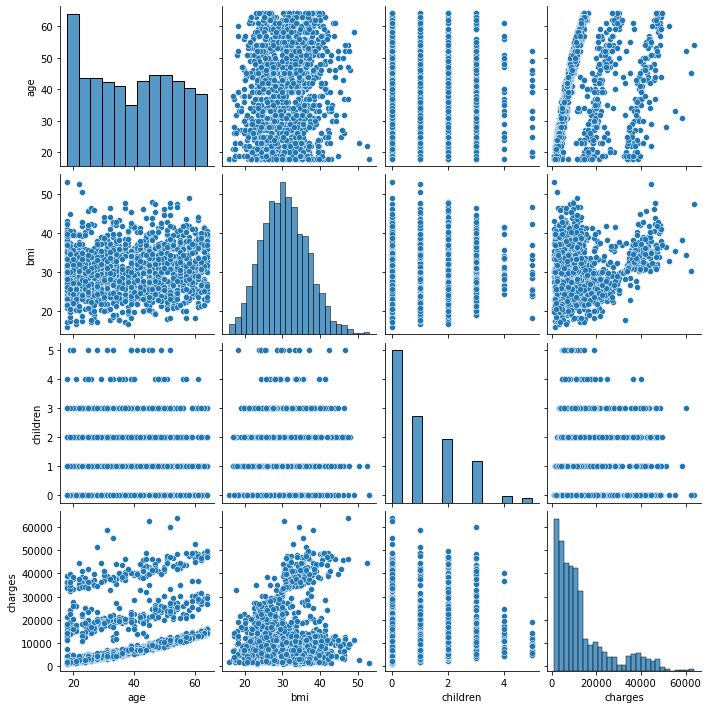

In [23]:
#Constructing numerous scatter plots of the numerical variables against one another
sns.pairplot(df[num_vals]);

### Observations

* We can see here that there is no obvious correlation between most of the variables but just to make sure we can use a regression plot to check if there's a slight positive correlation between bmi and charges for example 

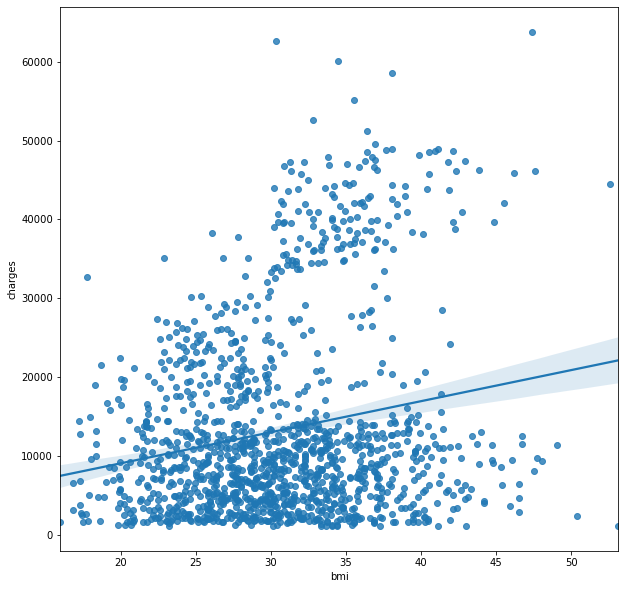

In [24]:
#We can create a regression plot that shall draw a regression line--
#--through the scatter plot to help us visualize the positive correlation

plt.figure(figsize=(10,10))
sns.regplot(x='bmi',y='charges', data=df); #Plotting a regression plot with bmi on the x-axis and charges on the y-axis

### Observations

* The very slight positive correlation between changes and bmi might indicate that the higher the BMI of a customer the more the customer pays in charges for insurance

## Sex against BMI

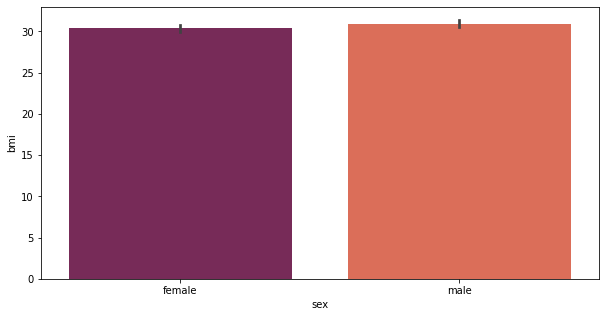

In [25]:
#Plotting a bar plot with sex on the x-axis and bmi on the y-axis
plt.figure(figsize=(10,5))
sns.barplot(x="sex", y="bmi", data=df, palette='rocket');

### Observations

* BMI's are relatively the same on average regardless of the gender.

## Smoker against BMI

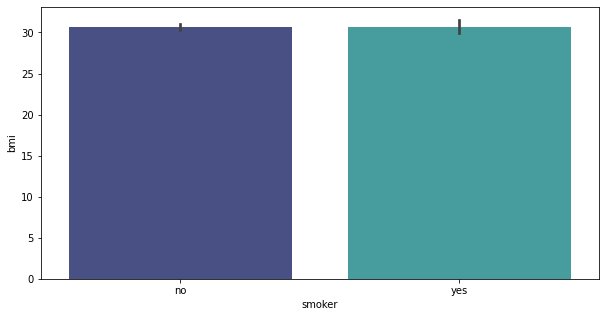

In [26]:
#Plotting a bar plot with smoker on the x-axis and bmi on the y-axis
plt.figure(figsize=(10,5))
sns.barplot(x="smoker", y="bmi", data=df, palette='mako');

### Observations

* BMI's are relatively high on average regardless of whether the customer smokes or not.

## Smoker against charges

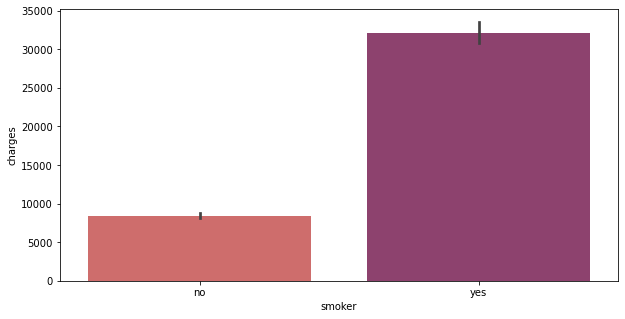

In [27]:
#Plotting a bar plot with smoker on the x-axis and charges on the y-axis
plt.figure(figsize=(10,5))
sns.barplot(x="smoker", y="charges", data=df, palette='flare');

### Observations

* Customers who smoke pay higher charges in health insurance than those who don't.

## Children against charges

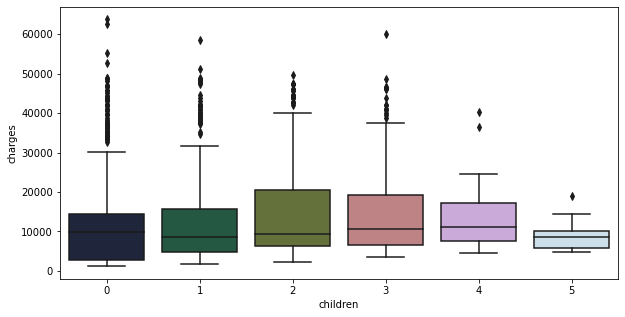

In [44]:
#Box plot with children on the x-axis and charges on the y-axis
plt.figure(figsize=(10,5))
sns.boxplot(x='children', y='charges', data=df, palette='cubehelix');

### Observations

* Customers who have 2 or 3 children pay the most charges with customers who have 5 children paying the least.

## Multivariate Analysis

### Region against Charges with hue as Sex

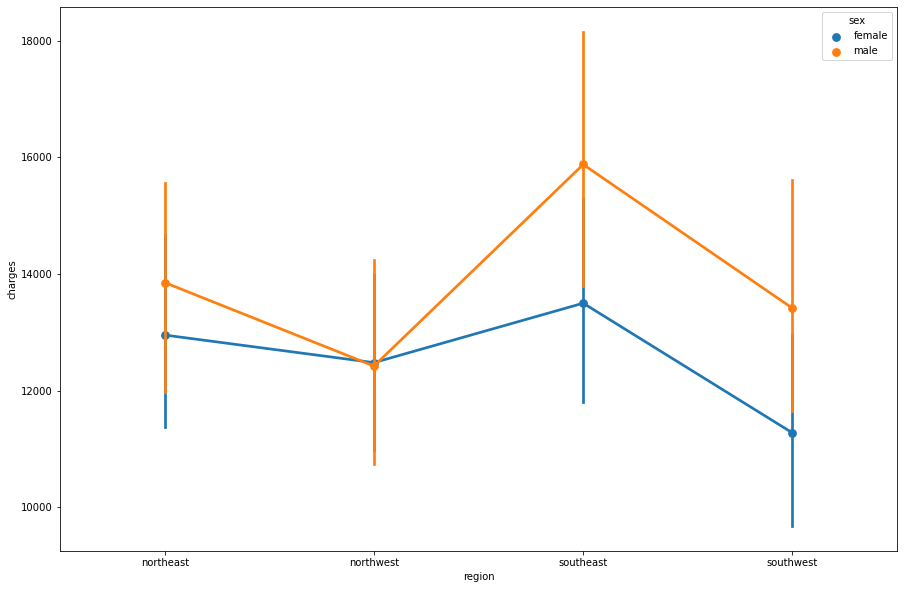

In [30]:
plt.figure(figsize=(15,10))
sns.pointplot(x="region",y="charges",hue="sex", data=df);

### Observations

* In most regions, males pay higher charges than females except in the northwest region where the charges is averagely the same

### Region against Age with hue as Smoker

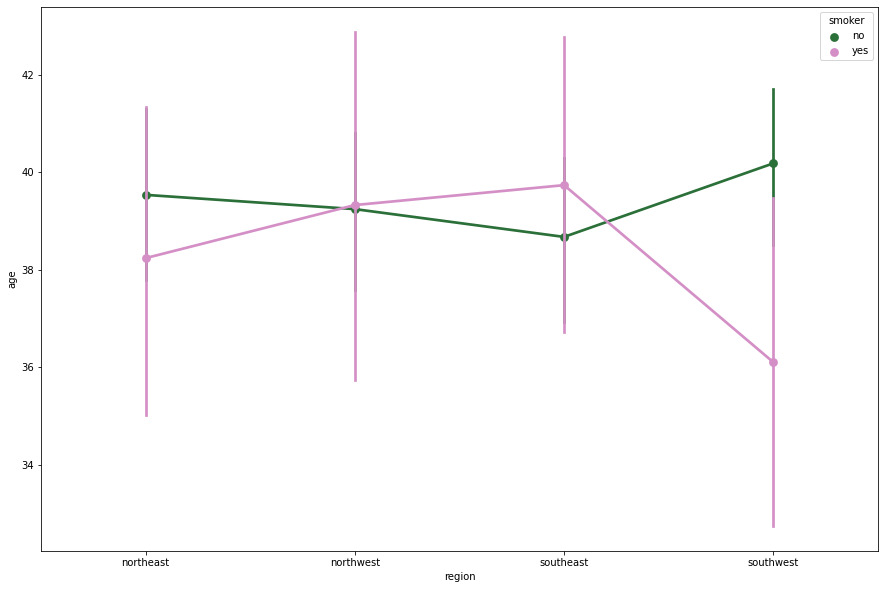

In [31]:
plt.figure(figsize=(15,10))
sns.pointplot(x='region', y='age',hue='smoker', data=df, palette='cubehelix');

### Observations

* In the northeast and southwest regions, people who don't smoke are older than those who do, while in southeast region, people who smoke are older.
* Customers who smoke and don't smoke are relatively the same age from the northwest region.

### Children against BMI with hue as Sex

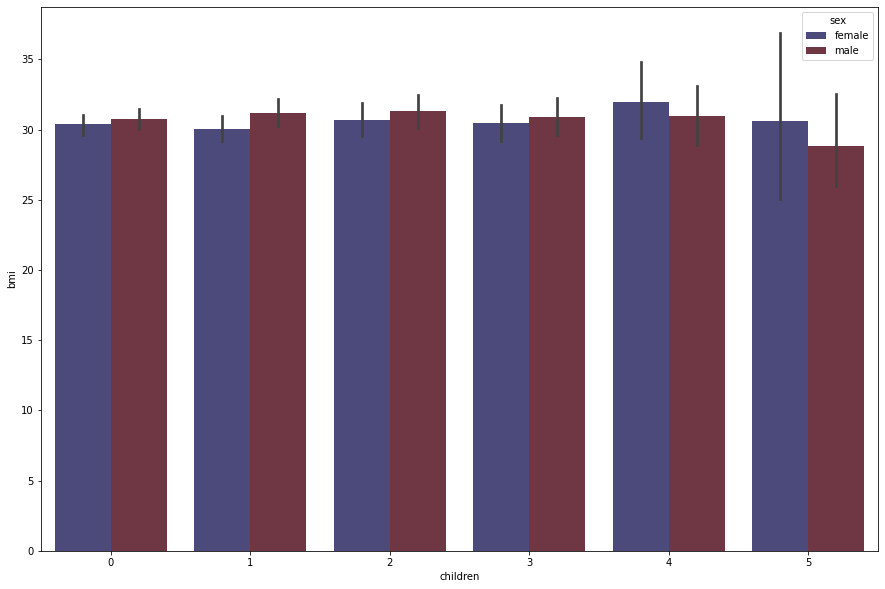

In [32]:
#Bar plot with Product on the x-axis and Income on the y-axis
plt.figure(figsize=(15,10))
sns.barplot(x='children', y='bmi',hue='sex', data=df, palette='icefire');

### Observations

* The average BMI for women who have 0-3 children or 5 children is relatively the same, with women with 4 children being slightly higher than the average.
* The BMI for men who have 0-4 children is relatively the same, where men with 5 children have slightly lower BMI.

### Smoker against Count with hue as Region

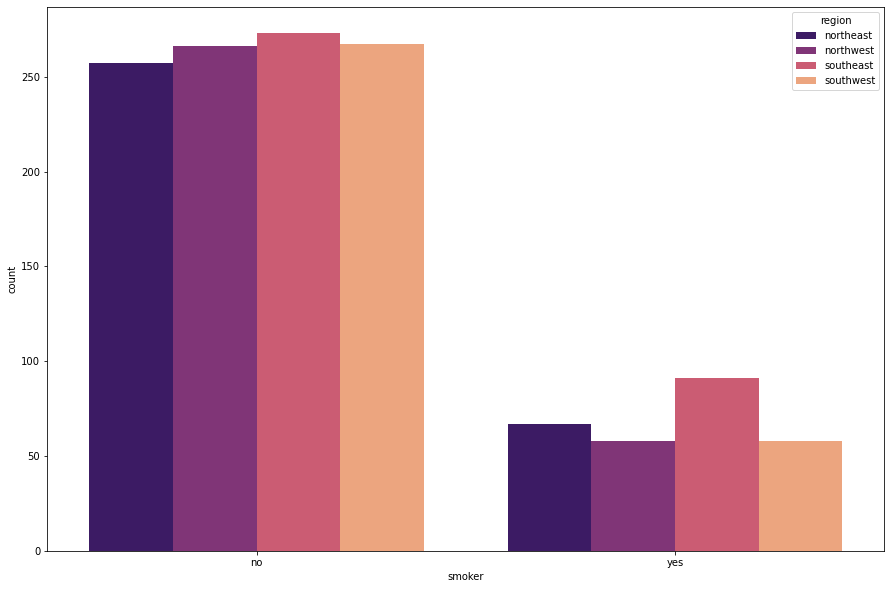

In [42]:
plt.figure(figsize=(15,10));
sns.countplot(x='smoker',hue = 'region',data=df, palette='magma');

### Observations

* Customers who don't smoke are relatively the same number across all regions while customers who smoke are somewhat the same in the northwest and the southwest but slightly higher in the northeast, with the southeast being the most.

## *Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?*

- The level of significance (α) = 0.05.

**Hypothesis Formulation**

Use the independent 2 sample T test: Two Sample test of Means:

Null Hypothesis($H_{0}): \mu_{Charges of smokers} - \mu_{Charges of non-smokers} <= 0$ (Medical claims of smokers are not greater)

Alternate Hypothesis($H_{a}): \mu_{Charges of smokers} - \mu_{Charges of non-smokers} > 0$ (Medical claims of smokers are greater)

In [33]:
#Formulate the groups containing the charges of smokers and non-smokers respectively

#group containing the charges of smokers
group1 = df[df.smoker=='yes']['charges']

#group containing the charges of non-smokers
group2 = df[df.smoker=='no']['charges']

#The function for a 2 smaple independent T-test which returns the T statistic and a p-value after giving both groups as input
t_stat, p_val = stats.ttest_ind(group1,group2)

#Gives the t-statistic and p-value for a two tailed t-test
print(t_stat,p_val)

46.64479459840305 1.4067220949376498e-282


In [34]:
#to calculate the p-value for a 1 tailed T-test
p_val1 = p_val/2
print(p_val1)

7.033610474688249e-283


In [35]:
print ('The T statistic is:',t_stat,'\n''The corresponding pvalue is :',p_val1)

The T statistic is: 46.64479459840305 
The corresponding pvalue is : 7.033610474688249e-283


**The test leads to the conclusion that:**

* The p-value is 7.034e-283 which is less than the 0.05 level of significance,therefore we reject the null hypothesis.
* This means the medical claims of smokers is greater than that of non-smokers

## *Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.*

- The level of significance (α) = 0.05.

**Hypothesis Formulation**

Use the T test: Two Sample test of Means:

Null Hypothesis($H_{0}): \mu_{BMI of Females} - \mu_{BMI of males} = 0$ (The BMI of females is the same with that of males)

Alternate Hypothesis($H_{a}): \mu_{BMI of Females} - \mu_{BMI of Males} \neq 0$ (BMI of females is not the same with that of males)

In [36]:
#Formulate the groups containing the BMI of females and males respectively

#group containing the BMI of females
group1 = df[df.sex=='female']['bmi']

#group containing the BMI of males
group2 = df[df.sex=='male']['bmi']

#The function for a 2 smaple T-test which returns the T statistic and a p-value after giving both groups as input
t_stat, p_val = stats.ttest_ind(group1,group2)

#Gives the t-statistic and p-value for a two tailed t-test
print(t_stat,p_val)

-1.6970672301298684 0.08991704324931137


In [37]:
print ('The T statistic is:',t_stat,'\n''The corresponding pvalue is :',p_val)

The T statistic is: -1.6970672301298684 
The corresponding pvalue is : 0.08991704324931137


**The test leads to the conclusion that:**

* The p-value is 0.0899 which is greater than the 0.05 level of significance,therefore we do not reject the null hypothesis.
* This means the BMI of females is not different from that of males statistically.

## *Is the proportion of smokers significantly different across different regions?*

**Hypothesis Formulation**

Use the Chi Square Test:

Null Hypothesis($H_{0}$): Proportion of smokers are not significant across different regions

Alternate Hypothesis($H_{a}$): Proportion of smokers are significant across different regions

The level of significance (α) = 0.05

In [38]:
#Getting the numbers of smokers in a particular region

#Northeast region
ne = df[df.region=='northeast'][df.smoker=='yes']['smoker'].count()
#Northwest region
nw = df[df.region=='northwest'][df.smoker=='yes']['smoker'].count()
#Southeast region
se = df[df.region=='southeast'][df.smoker=='yes']['smoker'].count()
#Southwest region
sw = df[df.region=='southwest'][df.smoker=='yes']['smoker'].count()

#Getting the numbers of non-smokers in a particular region

#Northeast region
nen = df[df.region=='northeast'][df.smoker=='no']['smoker'].count()
#Northwest region
nwn = df[df.region=='northwest'][df.smoker=='no']['smoker'].count()
#Southeast region
sen = df[df.region=='southeast'][df.smoker=='no']['smoker'].count()
#Southwest region
swn = df[df.region=='southwest'][df.smoker=='no']['smoker'].count()


#Creating a contingency table containing the frequencies of the smokers and non smokers in a different regions
crosstab = pd.DataFrame({'Northeast':[ne,nen], 'Northwest':[nw,nwn], 'Southeast':[se,sen], 
                         'Southwest':[sw,swn]}, index=['Smokers','Non-smokers']);

crosstab

,Northeast,Northwest,Southeast,Southwest
Smokers,67,58,91,58
Non-smokers,257,266,273,267


In [39]:
#Getting the test statistic and the p value
chi2, pval, dof, exp_freq = chi2_contingency(crosstab, correction = False);

chi2,pval

(7.277902541321909, 0.06354826573182332)

In [46]:
print ('The T statistic is:',chi2,'\n''The corresponding pvalue is :',pval)

The T statistic is: 7.277902541321909 
The corresponding pvalue is : 0.06354826573182332


**The test leads to the conclusion that:**

* The p-value is 0.063 which is greater than the 0.05 level of significance,therefore we do not reject the null hypothesis.
* This means the proportions of smokers are not significantly different across different regions.

## *Is the mean BMI of women with no children, one child, and two children the same?*

**Hypothesis Formulation**

Use the One Way Anova Test:

Null Hypothesis($H_{0}$): All the means of female BMI with respect to the number of children (0,1 and 2) are equal

Alternate Hypothesis($H_{a}$): Atleast one of the means of female BMI with respect to the number of children (0,1 and 2) is unequal

The level of significance (α) = 0.05

In [40]:
#creating a new dataframe containing the information of only females with 2 or less children
new_df = df[df.sex=='female'][df.children<=2]

In [41]:
#Creating anova table from which I shall extract my p-value
formula = 'bmi~children'
model = ols(formula, new_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq    mean_sq         F   PR(>F)
children    1.0      2.512982   2.512982  0.068411  0.79376
Residual  564.0  20717.738725  36.733579       NaN      NaN


**The test leads to the conclusion that:**

* The p-value is 0.794 which is greater than the 0.05 level of significance,therefore we do not reject the null hypothesis.
* This means the average BMI of females with 0, 1 and 2 children is the same

# Conclusion

* We discovered visually that customers who smoke pay more in charges for health insurance, and that also tallies with the statistical evidence we found proving medical claims are greater for customers who smoke. 

* Statistically, we found out that the BMI of females is the same as the BMI of males, and we also saw that earlier in a visual representation.

* Even though we discovered that visually, the proportions of smokers are slightly different across the regions, statistically it doesn't prove to be the case as the proportions are not significantly different enough.

* We saw that visually the average BMI for women who have 0-3 children was the same and that was backed up by our findings statistically where the mean BMI of females with 0, 1 or 2 children is the same.

## Outliers Treatment

In [415]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

### Treating the outliers

In [416]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
#df = treat_outliers_all(df,numerical_col)

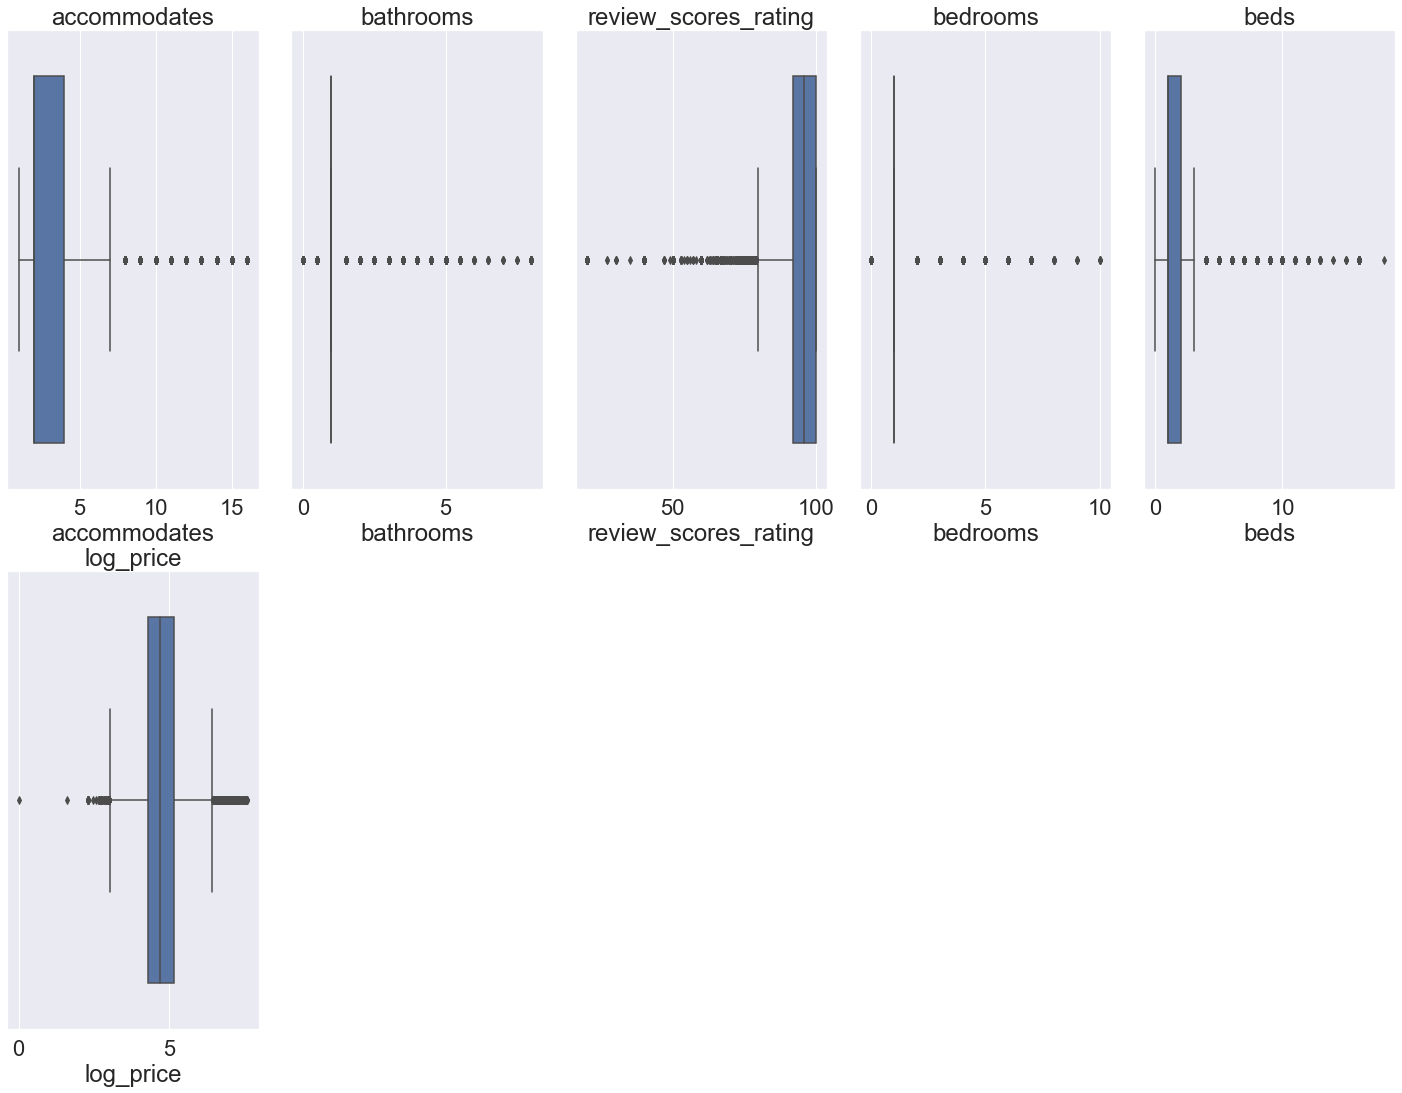

In [417]:
# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,75))

for i, variable in enumerate(numerical_col):
                     plt.subplot(10,5,i+1)
                     sns.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
## Outliers Treatment

# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

### Treating the outliers

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
#df = treat_outliers_all(df,numerical_col)

# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,75))

for i, variable in enumerate(numerical_col):
                     plt.subplot(10,5,i+1)
                     sns.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()